## Project 2018 - "Programming For Data Analysis"

### A Notebook by: Marco Men

### Date Of Last Commit: 14th December 2018

## Introduction

In this notebook I will be choosing a  real-world phenomenon ( stock price fluctuations ) and strategy creation based on real data.
I will be :
 *  Investigating the types of variables involved ( their distributions and relationships with each other ) ;
 *  Simulating/synthesising the dataset as closely matching their properties as possible ;
 *  And detailing my research and implement the simulation in this Jupyter notebook .

Before I continue, I must give you some insight on the Python package used to download and retrieve the historical stock information ( NSANY - Nissan's stock code ) and why. 

The package I am refering to is called "fix-yahoo-finance", created by Ran Aroussi to provide a fix to "Pandas Datareader ( "get_data_yahoo()" ) . This Pandas Datareader command relied on Yahoo!Finance API, which has been decommissioned after AOL's acquisition of Yahoo.

This package must be installed on your machine, if you intend to download/clone this notebook and run it locally.

As the package is not part of Anaconda version of python, only pip install works ( not conda install ). More information can be found [here](https://pypi.org/project/fix-yahoo-finance/). 

If the previous method does not work, an alternative method is to clone a [GitHub folder](https://github.com/ranaroussi/fix-yahoo-finance) into your machine and run either "python setup.py install" inside your cloned folder.



# The Story For The Simulation

I believe every simulation should start with a story. The story is fictitious, so I had to use my imagination and creativity.

Let's say I work in a stock trading firm in the "quant" department. I was asked to investigate Nissan's stock price fluctuations and come up with potential outcomes for next year, based on Nissan's stock price history.

In [8]:
# https://stackoverflow.com/questions/49705047/downloading-mutliple-stocks-at-once-from-yahoo-finance-python

import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt

yf.pdr_override()



# Nissan stock prices
tickers = ['NSANY']

start_date = '2017-07-22'
end_date = '2018-12-11'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
nis = pdr.get_data_yahoo(tickers,start=start_date, end=end_date)
nis.info()

nis.head()

[*********************100%***********************]  1 of 1 downloaded
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 350 entries, 2017-07-21 to 2018-12-10
Data columns (total 6 columns):
Open         350 non-null float64
High         350 non-null float64
Low          350 non-null float64
Close        350 non-null float64
Adj Close    350 non-null float64
Volume       350 non-null int32
dtypes: float64(5), int32(1)
memory usage: 17.8 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-21,20.320000,20.400000,20.250000,20.400000,18.976952,28000
2017-07-24,20.430000,20.500000,20.350000,20.389999,18.967649,71000
2017-07-25,20.530001,20.530001,20.350000,20.450001,19.023464,82500
2017-07-26,20.200001,20.549999,20.200001,20.510000,19.079279,51700
2017-07-27,20.299999,20.440001,20.170000,20.340000,18.921137,20900


Now I have the Nissan's historical stock data loaded as 'nis'. I will get a summary of descriptive statistics for all the variables I am attempting to simulate on my sinthesised dataset. They are:
* Open - the price at the period open;
* High - the highest price value of the period;
* Low - the lowest price value of the period;
* Close - the price at the period close.

The reason being is that I will use the information given together with the density distribution for each variable to (pseudo) randomnly generate my dataset by choosing the most appropriate numpy.random() distribution package.

If this notebook will be cloned or downloaded and ran in the future different results may be yielded. One point I would like to make is that since the plots for the sinthesised data below will be  randomnly generated, each time this notebook is re run, different results will be yielded, and so will the plots be changed to the values generated.

My analysis is based on the outputs of my last run of this Jupyter Notebook code cells.

If you would like further information on OHLC variables and charts, the following links provide detailed information:

* https://www.investopedia.com/terms/b/bar.asp

* https://www.investopedia.com/terms/o/ohlcchart.asp

## The Variables

Now I will check what type of distribution each variable column forms, by plotting its density and gathering information from the descriptive statistics for each variable to be used in my modelling ( i.e. standard deviation and mean ).

## Open Column

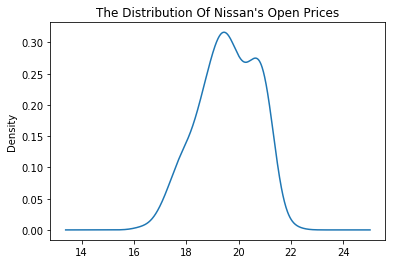

In [9]:
# The real Nissan close prices distribution
plt.title('The Distribution Of Nissan\'s Open Prices')
nis['Open'].plot.density()

## High Column

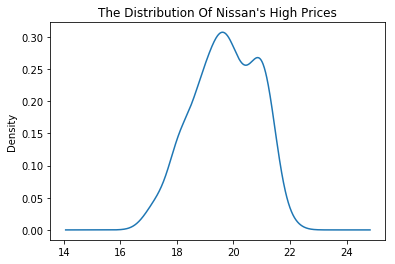

In [11]:
# The real Nissan close prices distribution
plt.title('The Distribution Of Nissan\'s High Prices')
nis['High'].plot.density()

## Low Column

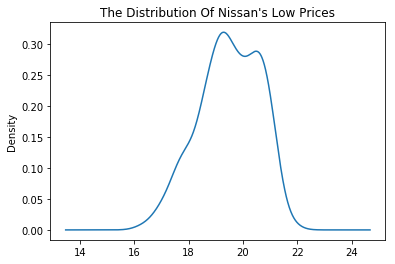

In [13]:
# The real Nissan low prices distribution
plt.title('The Distribution Of Nissan\'s Low Prices')
nis['Low'].plot.density()

## Close Column


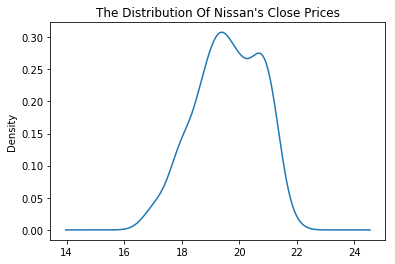

In [49]:
# The real Nissan close prices distribution
plt.title('The Distribution Of Nissan\'s Close Prices')
nis['Close'].plot.density()

As far as data visualisation of the density distribution for all 4 variables, they are represented by the same distribution. It appears to be a multivariate normal distribution. For my simulation I will simplify this by using random normal distribution to achieve similar results, since the peaks are concentrated in the middle ( mean ) section. I will use the standard deviation to adjust the skewess of the density plots of my simulated data.

I will generate a summary of descriptive statistics to assist me in using approximated numerical data to randomnly generate my data.

In [18]:
nis.describe()

,Open,High,Low,Close,Adj Close,Volume
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,19.582200,19.703057,19.487314,19.605429,18.887979,84289.142857
std,1.120339,1.136481,1.115350,1.127583,0.907297,79560.925074
min,16.299999,16.760000,16.280001,16.610001,16.610001,12400.000000
25%,18.807499,18.872501,18.724999,18.809999,18.224174,41950.000000
50%,19.600001,19.724999,19.515000,19.575000,18.606785,61050.000000
75%,20.527501,20.687501,20.407500,20.590000,19.665270,92000.000000
max,22.120001,22.139999,21.870001,21.900000,20.845568,821100.000000


## Statistics Of Variables

According to the summary above all the variables I will be sinthesising have similar numerical data. The statistical measurements I am most interested are the **mean, standard deviation,minumum value and maximum value**. The minimum and maximum values are my ranges when generating my fake data, the standard deviation is of importance 
I will use the information from the summary of descriptive statistics to simulate the 'OHLC' columns. In my simulations I will make a dataset with 350 counts and **normally-distributed**. I will follow the guidance from [numpy's](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) website.

The formula I will be using is as follows :

$$ \sigma * np.random.normal() + \mu $$

Where I will be using the same distribution but tweaking with the $\sigma$ and $\mu$ values to approximately fit the descriptive statistics displayed above. If not for this tweaking I would be using MultiIndex for columns with the columns' names and a mocked data with similar distribution as any of the ones below. But because I would use the same distribution to randomnly generate for all 4 variables I would not have control over how the numbers would be spread across the multiple variables.


There is a 'Close' and 'Adjusted Close' columns. The main difference between these two columns is that 'Close' column is *ex-dividends* ( before any dividends are paid ) and the 'Adjusted Close' is *post-dividends*. I am interested in the *ex-dividends* 'Close' column. Some investment managers use the 'Adjusted Close' as they claim it provides a more realistic view, but in a forecast scenario, the investor has no input nor knowledge of what dividends will be paid in the future. Also, pointing to the formula mentioned above, the *final value includes dividends and interest*.

I will disregard 'Adjusted Close and 'Volume'.


In [50]:
# Simulation of variables column

op = pd.Series(1.12 * np.random.normal(0,0.1,350) + 19.58,name = 'Open')


hi = pd.Series(1.14 * np.random.normal(0,0.1,350) + 19.7,name = 'High')


lo = pd.Series(1.12 * np.random.normal(0,0.1,350) + 19.5,name = 'Low')

clo = pd.Series(1.13 * np.random.normal(0,0.1,350) + 19.61,name = 'Close')

df_simul = pd.concat([op,hi,lo,clo],axis = 1)

# Create a time series index from the dataframes above

dates = pd.date_range('1/1/2019', periods=350, freq='D')



# Setting dates as index for data

df_simul.index = dates
df_simul = df_simul.rename_axis('Date', axis=1)

df_simul.info()

df_simul.head()
 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 350 entries, 2019-01-01 to 2019-12-16
Freq: D
Data columns (total 4 columns):
Open     350 non-null float64
High     350 non-null float64
Low      350 non-null float64
Close    350 non-null float64
dtypes: float64(4)
memory usage: 13.7 KB


Date,Open,High,Low,Close
2019-01-01,19.701553,19.659160,19.574529,19.584469
2019-01-02,19.556225,19.784003,19.496067,19.633483
2019-01-03,19.681738,19.530249,19.631208,19.617341
2019-01-04,19.685902,19.719554,19.575354,19.636422
2019-01-05,19.780188,19.608800,19.678183,19.550028


In [20]:
df_simul.describe()

Date,Open,High,Low,Close
count,350.000000,350.000000,350.000000,350.000000
mean,19.573879,19.690661,19.506154,19.603000
std,0.107558,0.104148,0.116704,0.116839
min,19.259883,19.347289,19.194777,19.289593
25%,19.501328,19.623305,19.432982,19.526217
50%,19.571985,19.693051,19.509397,19.606583
75%,19.651695,19.760188,19.579247,19.679711
max,19.868612,20.018370,19.877924,19.964802


# The Sinthesised Dataset

The dataset simulated above is based on Nissan stock price fluctuation across 'Open', 'High', 'Low' and 'Close' columns. All variable columns generated are based on the distribution of Nissan real variables' column from 14/07/2017 until 04/12/2018, with minor adjustments to the  $ \sigma $ values ( or **standard deviation** ) for each of the simulated variables.  

Now let us check the density distribution of 4 sinthesised variable prices ( OHLC ).

## Probability Distributions Of Variables

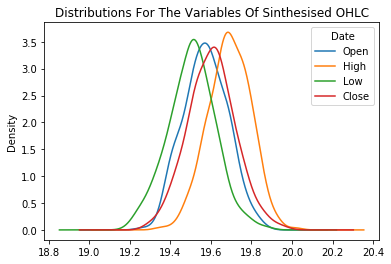

In [21]:
df_simul.plot.density()
plt.title('Distributions For The Variables Of Sinthesised OHLC')
plt.show()

All of the variables are represented as **normally distributed** and this is clearly represented by the plot above

Next, I will calculate Market Log Returns from Nissan's 'Close' column and then plot its density distribution. And after that try and create similar type of information on my simulated dataset ( Market_Returns ) to plot them. The Market Returns is simply calculated with the following formula :

$\log \bigg(\frac{Closing\ Price(Yesterday)}{Closing\ Price(Today)} \bigg)$ 

This is because the Close Price column is **normally distributed** and its returns are an approximation **log normal** distribution. A very good explanation can be found in [Quantitivity](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).



## Market Log Returns


The reason for this paragraph is because I will be simulating stock prices and log returns, which will be based onb the Close Stock Prices. The Close variables will be given and constant ( on a daily basis ). The Log Returns will be calculated based on the difference of the stock returns for two consecutive periods. Which in the case depicted in this notebook will be daily returns. So, the Close variables will be the **nominal price** variable and the Returns variables will be the **measurement of the price daily variation**.

The first period will be given a 0 amount, through programming in Pandas, otherwise I would end up with a NaN. This is because there is not a prior period for the calulation of period differences.

The following example was retrieved from [investopedia's](https://www.investopedia.com/articles/investing/102014/lognormal-and-normal-distribution.asp) website:

An investor wants to know an expected future stock price. Since stocks grow at a compounded rate, she needs to use a growth factor. To calculate possible expected prices, she will take the current stock price and multiply it by various rates of return (which are mathematically derived exponential factors based on compounding) and which are assumed to be normally distributed. When the investor continuously compounds the returns, she creates a lognormal distribution which is always positive, even if some of the rates of return are negative, which will happen 50% of the time in a normal distribution. The future stock price will always be positive because stock prices cannot fall below $0.

The formula for the **logarithmic or continuously compounded return** is :

$$ R = ln \bigg(\frac {V_f} {V_i}\bigg)$$

Where

$V_f = Final Value ( including\ dividends\ an\ interest )$

$V_i = Initial Value ( Yesterday's\ Closing\ Value ) $

A good article on **market log returns** can be found in [quantivity](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).

The other method would be calculating **percentage changes in prices**, which is depicted by the following formula:

$$ \frac{P_1 - P_2} {P_1} * 100 $$

Where:

$ P_1 = Yesterday's \ Closing\ Price \\
 P_2 = Today's\ Closing\ Price $
 

## Nissan's Market Returns

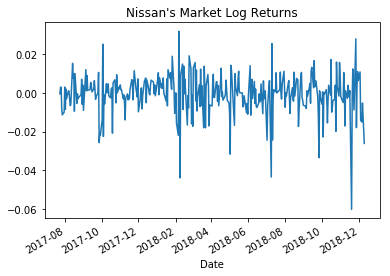

In [22]:
 # Another way to calculate log returns and we drop the NAs
    
nis['Market'] = np.log(nis.Close).diff()

nis = nis.dropna()


# The Market log returns

plt.figure()
nis.Market.plot()
plt.title('Nissan\'s Market Log Returns')
plt.show()

A classical daily return plot. Let me focus your attention to the lowest point,it may be due to recent scandals regarding Board Members,CEO and Chairman. Remember that we are dealing with real historical stock data for Nissan.

Next let us  check the density plot.

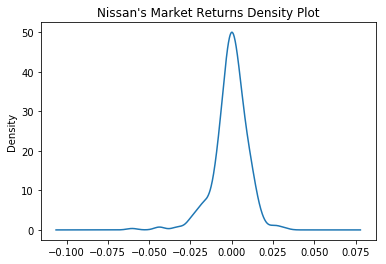

In [23]:
# The real Nissan market returns density plot

plt.figure()
nis.Market.plot.density()
plt.title('Nissan\'s Market Returns Density Plot')
plt.show()

The distribution of market log returns appears to be normal distribution with mean around than 0 and standard deviation of around 0.025. But as being the sceptical that I am, I will double check by asking Pandas. Depending on the results I will get, I will eiter use randn or random_normal. I will be following numpy.org guidance when generating numbers ( pseudo ) randomly. So, I will need the standard deviation and the mean of the distribution above. I will ask Pandas to give me a description of summary statistics.

In [24]:
nis.Market.describe()

count    349.000000
mean      -0.000589
std        0.010240
min       -0.060277
25%       -0.004990
50%        0.000000
75%        0.005249
max        0.031839
Name: Market, dtype: float64

In [51]:

# Simulation of 'Log Returns'


df_simul['Returns'] = np.log(df_simul.Close).diff()

df_simul = df_simul.fillna(0)  # Fill NA with 0 for the first row

df_simul.head()

Date,Open,High,Low,Close,Returns
2019-01-01,19.701553,19.659160,19.574529,19.584469,0.000000
2019-01-02,19.556225,19.784003,19.496067,19.633483,0.002500
2019-01-03,19.681738,19.530249,19.631208,19.617341,-0.000823
2019-01-04,19.685902,19.719554,19.575354,19.636422,0.000972
2019-01-05,19.780188,19.608800,19.678183,19.550028,-0.004409


They are a quite good approximation of Nissan's data. The log returns are merely calculated from the Close variables in my simulate ( sinthesised ) dataset.

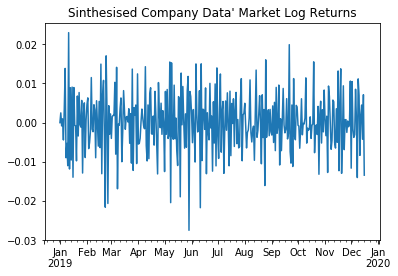

In [52]:
# Now the Log Returns plot

plt.figure()
df_simul.Returns.plot()
plt.title('Sinthesised Company Data\' Market Log Returns')
plt.show()

The plot above represents fluctuations of stock price percentages from one day to the next.

The intervals are from -0.03 to +0.02. On the actual Nissan plot ( above ) the interval is from -0.06 to +0.03.

I will attempt to plot both the 'Close' and 'Returns' on top of each other to better visualise the variances of prices

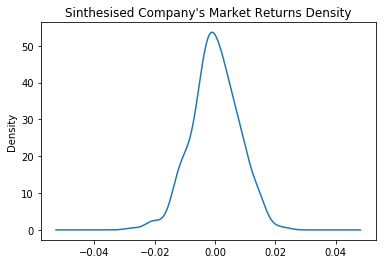

In [53]:

# Simulated market log returns distributions for fake companies

plt.figure()
df_simul.Returns.plot.density()
plt.title('Sinthesised Company\'s Market Returns Density')
plt.show()

This density distribution is again a good representation of log returns from within s similar standard deviation intervals and mean as the Nissan's distribution.

<Figure size 432x288 with 0 Axes>

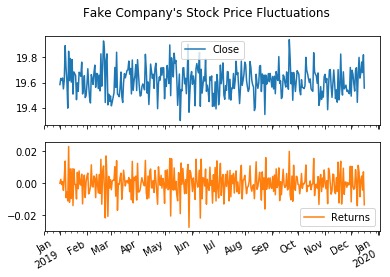

In [54]:
# Stock price fluctuations for Df_simul of Close and Returns

plt.figure()
df_simul[['Close', 'Returns']].plot(title=('Fake Company\'s Stock Price Fluctuations'),
                                    subplots=True,)

plt.show()

The 2 plots above represent the variations of prices in nominal terms ( upper plot ) and in percentual terms ( lower plot ) spread across the time series with a monthly frequency.
As technical analysis go, There are high levels of volatility in January, March, May and June 2019( begining and middle ) forecasted, but the month with the highest forcasted volatility is June 2019, this is where the returns plot variance is bigger. 

The link between the two plots is due to a high variance  from one period to its subsequent period in **Close Price**. *So the higher the gap between two measured  Close price periods, the higer the variance in Returns*. 

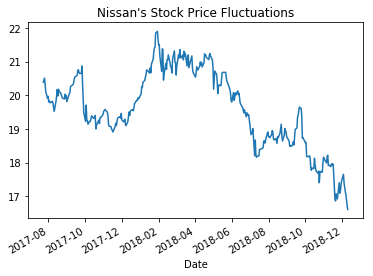

In [28]:
# Stock price fluctuations for Nissan

plt.figure()
nis['Close'].plot()
plt.title('Nissan\'s Stock Price Fluctuations')
plt.show()

The plot above shows a simulation of potential variations of Nissan closing prices.

With this simulation, I can see the possible variation that Nissan's the stock price ( or a close competitor ) can have in the future under current conditions, *based on past historical information*.

This last part is crucial, as the basis for the prediction is the historical data and its variations in the past. Of course, it may / may not be realistically possible for past conditions to be relived again both on their **successes / failures**. Most companies try to learn from past errors and they build internal control systems to prevent future similar failures. The assumption is therefore, that future issues will have similar impact as seen before. The peaked prices could represent future product launches or further market expansion, but again not factoring **risks** of new competitors / new products launched by direct competition or bad press that can bring the brand to disrepute.

The scandal involving Nissan's CEO in recent months regarding financial manipulation and abuse of power is likely to lead to the market punishment in relation to stock prices.

In [30]:
df_simul.describe()

Date,Open,High,Low,Close,Returns
count,350.000000,350.000000,350.000000,350.000000,350.000000
mean,19.573879,19.690661,19.506154,19.603000,-0.000004
std,0.107558,0.104148,0.116704,0.116839,0.008287
min,19.259883,19.347289,19.194777,19.289593,-0.025324
25%,19.501328,19.623305,19.432982,19.526217,-0.005603
50%,19.571985,19.693051,19.509397,19.606583,-0.000808
75%,19.651695,19.760188,19.579247,19.679711,0.005430
max,19.868612,20.018370,19.877924,19.964802,0.024450


Looking at the summary of descriptive statistics from my simulated data and comparing it to the descriptive statistics of Nissan's data I can see how approximately the numerical statiscal values are for the OHLC variables. This means that my objective of sinthesising an aproximate numerical dataset is being achieved.

In [31]:
df_simul.head()

Date,Open,High,Low,Close,Returns
2019-01-01,19.335976,19.560567,19.495869,19.633034,0.000000
2019-01-02,19.577720,19.630133,19.559618,19.833706,0.010169
2019-01-03,19.500274,19.641230,19.245436,19.532501,-0.015303
2019-01-04,19.485182,19.563813,19.660000,19.607742,0.003845
2019-01-05,19.606374,19.660398,19.578127,19.732810,0.006358


In [32]:
df_simul.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 350 entries, 2019-01-01 to 2019-12-16
Freq: D
Data columns (total 5 columns):
Open       350 non-null float64
High       350 non-null float64
Low        350 non-null float64
Close      350 non-null float64
Returns    350 non-null float64
dtypes: float64(5)
memory usage: 16.4 KB


From the outputs from the code above, we can check that 350 values were filled across 5 columns. First is a DatetimeIndex with dates from 2019-01-01 to 2019-12-16, and then the 5 data columns with the OHLC variables and the Returns columns with 350 values ( non-null ) on each column. For the Returns column the reason why I did not get a null value is because I fill my NaN on the first row with the value 0.

## Conclusion

To recap, I have created a dataframe of a fake companies with OHLC ( Open,High,Low,Close ) columns and Returns column for each  based on the real Nissan historical stock prices( OHLC ). I also, included a TimeSeries index with 350 daily periods to my DataFrame from 01/01/2019 until 16/12/2019 ( most of next year ). 

Nissan's stock information is merely a proxy for my simulated dataframe. I also used as a benchmark in this notebook to demonstrate how I created my simulated dataframe.

I was asked to create a dataset and I ended up with a dataframe, which got me thinking about the differences between the two, if there were any. To quote a [Spark.apache](https://spark.apache.org/docs/latest/sql-programming-guide.html), a **dataset** is a distributed collection of data and a **DataFrame** is a dataset organized into named columns. It is conceptually equivalent to a table in a relational database or a data frame in R/Python, but with richer optimizations under the hood.

I would like to remind you about the close relationship between the **Normal and Lognormal Distribution**. The **lognormal** distribution is by definition a random variable whose natural logarithm is **normally distributed**.

I do not work for a Stock Trading firm and I am not a "quant", but I wanted to demonstrate the simulation of a time series and stock price movements are ideal for it. And also, carry research regarding probability distributions in stock movements.

One thing I learned in particular, is that **normal distribution** is "frowned" upon for being too simplistic in the area of financial modelling and engineering. At the same time is the most used distribution in this particular field of algorithm trading.




## Literature Review & References

'Python For Finance'- Yves Hilpisch

[DataCamp](https://www.datacamp.com/community/tutorials/finance-python-trading?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=261400735633&utm_targetid=aud-392016246653:dsa-473406585355&utm_loc_interest_ms=&utm_loc_physical_ms=20480&gclid=EAIaIQobChMI44eskMuI3wIVjEPTCh33TgFgEAAYASAAEgJxBvD_BwE)

[QuantConnect](https://www.quantconnect.com/tutorials/tutorial-series/introduction-to-financial-python)

[Investopedia](https://www.investopedia.com/)

[FinanceTrain](https://financetrain.com/)


